<link rel="stylesheet" href="berkeley.css">

<h1 class="cal cal-h1">Lecture 06: Linear Regression (1) – CS 189, Fall 2025</h1>


In this lecture we will explore the formulation of linear regression, basis functions, and geometry of linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed(42)


This Jupyter Notebook is designed to provide an interactive exploration of linear regression. 

## Key Learning Objectives:
1. **Understand the Basics of Linear Regression**:
- Explore the concept of fitting a straight line to data points.
- Learn about the parameters of a linear model: intercept and slope.

2. **Explore Basis Functions**:
- Learn how different basis functions (e.g., polynomial, Gaussian, Fourier) can transform the input space.
- Understand how these transformations enable linear regression to model non-linear relationships.

3. **Compare Linear and Polynomial Regression**:
- Fit and compare linear and polynomial regression models.
- Understand the trade-offs between underfitting and overfitting.

4. **Visualize Linear Regression Geometry**:
- Understand the geometric interpretation of linear regression in 2D and 3D spaces.
- Explore the concepts of residuals, hyperplanes, and the span of input features.

5. **Analyze Residuals**:
- Learn how to interpret residual plots to assess model fit.
- Understand the concept of heteroscedasticity and its implications.

6. **Apply Linear Regression to Real-World Data**:
- Use the California Housing dataset to fit a simple linear regression model.
- Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared.

### 1. **Understand the Basics of Linear Regression**:

A basic linear regression model predicts the output $y$ as a linear combination of input features $x$ and model parameters $w$. The general form of the model is:

$$
y(x, w) = x^T w
$$

Here, $x$ is the input vector, $w$ is the parameter vector, and $y(x, w)$ represents the predicted output. For a dataset with $D$ features, the model can be expressed as:

$$
y(x, w) = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_D x_D
$$

where:
- $w_0$ is the intercept (bias term),
- $w_1, w_2, \dots, w_D$ are the weights (coefficients) for the input features,
- $x = (x_1, x_2, \dots, x_D)^T \in \mathbb{R}^D$ is the input vector.

The goal of linear regression is to learn the parameters $w$ from the training data such that the predictions $y(x, w)$ closely match the true target values $t$.


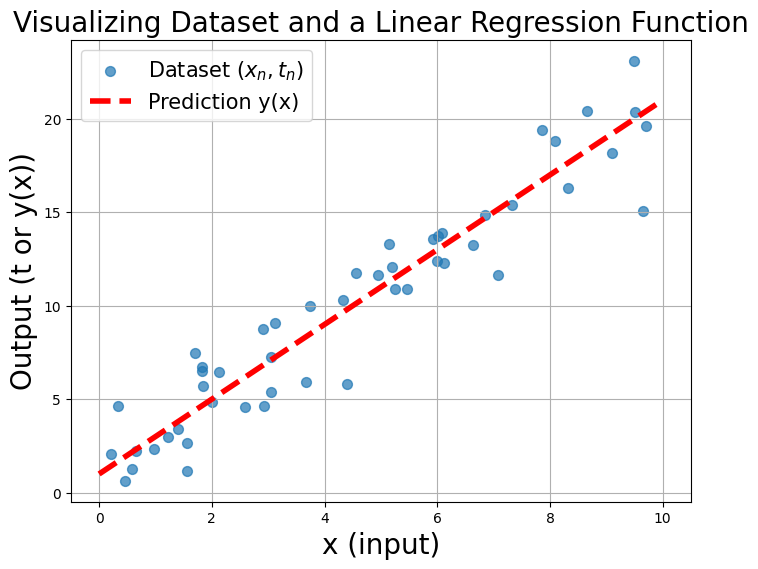

In [2]:
N = 50
x = np.random.rand(N) * 10
t = 2 * x + 1 + np.random.randn(N) * 2

x_pred = np.linspace(0, 10, 100)
y_conceptual = 2 * x_pred + 1

plt.figure(figsize=(8, 6))
plt.scatter(x, t, alpha=0.7, label='Dataset $(x_n, t_n)$', s=50)
plt.plot(x_pred, y_conceptual, color='red', linestyle='--', label='Prediction y(x)', linewidth=4.0)
plt.xlabel('x (input)', fontsize=20)
plt.ylabel('Output (t or y(x))', fontsize=20)
plt.title('Visualizing Dataset and a Linear Regression Function', fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)
# plt.savefig('conceptual_prediction.png')
plt.show()

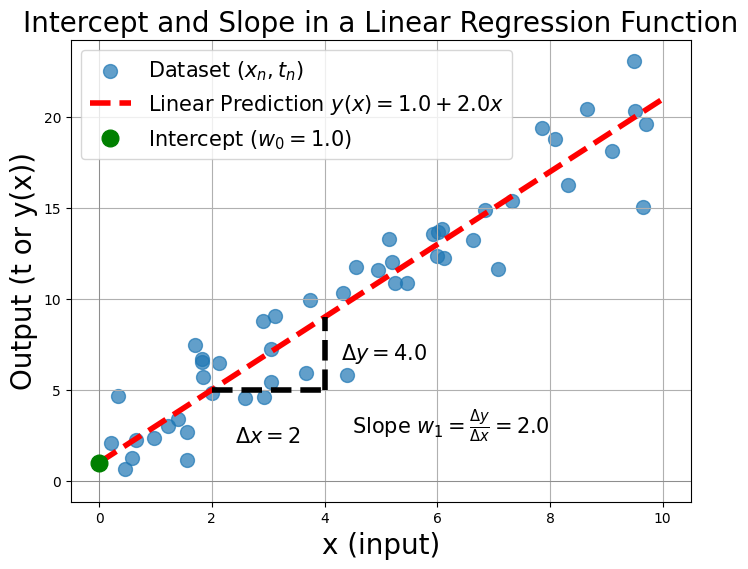

In [3]:
example_w0 = 1.0  
example_w1 = 2.0  

x_pred = np.linspace(0, 10, 100)
y_example_linear = example_w0 + example_w1 * x_pred

plt.figure(figsize=(8, 6))
plt.scatter(x, t, alpha=0.7, label='Dataset $(x_n, t_n)$', s=100)
plt.plot(x_pred, y_example_linear, color='red', linestyle='--', label=f'Linear Prediction $y(x) = {example_w0} + {example_w1}x$', linewidth=4.0)

plt.axhline(0, color='grey', lw=0.5) 
plt.axvline(0, color='grey', lw=0.5) 

plt.plot(0, example_w0, 'go', markersize=12, label=f'Intercept ($w_0={example_w0}$)') 

x_point_1 = 2
x_point_2 = 4
y_point_1 = example_w0 + example_w1 * x_point_1
y_point_2 = example_w0 + example_w1 * x_point_2

plt.plot([x_point_1, x_point_2], [y_point_1, y_point_1], 'k--', linewidth=4.0)
plt.plot([x_point_2, x_point_2], [y_point_1, y_point_2], 'k--', linewidth=4.0)
plt.text(x_point_1 + (x_point_2 - x_point_1)/2, y_point_1 - 2, f'$\Delta x = {x_point_2 - x_point_1}$', horizontalalignment='center', verticalalignment='top', fontsize=15)
plt.text(x_point_2 + 0.3, y_point_1 + (y_point_2 - y_point_1)/2, f'$\Delta y = {y_point_2 - y_point_1}$', horizontalalignment='left', verticalalignment='center', fontsize=15)
plt.text(8, 2, f'Slope $w_1 = \\frac{{\Delta y}}{{\Delta x}} = {example_w1}$', horizontalalignment='right', verticalalignment='bottom', fontsize=15)

plt.xlabel('x (input)', fontsize=20)
plt.ylabel('Output (t or y(x))', fontsize=20)
plt.title('Intercept and Slope in a Linear Regression Function', fontsize=20)
plt.legend(fontsize=15)
plt.grid(True)
# plt.savefig('intercept_slope_illustration.png')
plt.show()

In higher dimensions, the predicted values from a linear regression model form a **hyperplane** in $ℝ^{𝐷+1}$, where $𝐷$ is the number of input features. 

This hyperplane represents the relationship between the input features and the predicted output. Each point on the hyperplane corresponds to a predicted value for a specific combination of input features. The geometry of this hyperplane is determined by the model's coefficients (slopes) and the intercept (bias term).

In [4]:
N = 50
x1 = np.random.rand(N) * 10
x2 = np.random.rand(N) * 10

t = 2 * x1 + 3 * x2 + 5 + np.random.randn(N) * 5

X = np.vstack((x1, x2)).T

model = LinearRegression()
model.fit(X, t)

# Get the coefficients (w1, w2) and the intercept (w0)
w1, w2 = model.coef_
w0 = model.intercept_

print(f"Fitted model: t = {w0:.2f} + {w1:.2f}*x1 + {w2:.2f}*x2")

# Create a grid of x1 and x2 values for the hyperplane
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 12),
                               np.linspace(x2.min(), x2.max(), 12))
t_surf = w0 + w1 * x1_surf + w2 * x2_surf

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=x1, y=x2, z=t,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Dataset (x₁, x₂, t)'
))

fig.add_trace(go.Surface(
    x=x1_surf, y=x2_surf, z=t_surf,
    colorscale=[[0, 'red'], [1, 'red']],  
    opacity=0.5,
    showscale=False, 
    name='Fitted Hyperplane'
))

fig.update_layout(
    title='3D Visualization of Linear Regression and Fitted Hyperplane',
    scene=dict(
        xaxis=dict(
            title='x₁',
            backgroundcolor='white',
            gridcolor='lightgray'
        ),
        yaxis=dict(
            title='x₂',
            backgroundcolor='white',
            gridcolor='lightgray'
        ),
        zaxis=dict(
            title='Output (t or y(x))',
            backgroundcolor='white',
            gridcolor='lightgray',
        ),
        bgcolor='white' 
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    font=dict(size=14),
    legend=dict(font=dict(size=12)),
)

# fig.to_image(format="png", width=800, height=400)
# fig.write_html("linear_regression_3d.html")
fig.show()

Fitted model: t = 6.79 + 2.24*x1 + 2.64*x2


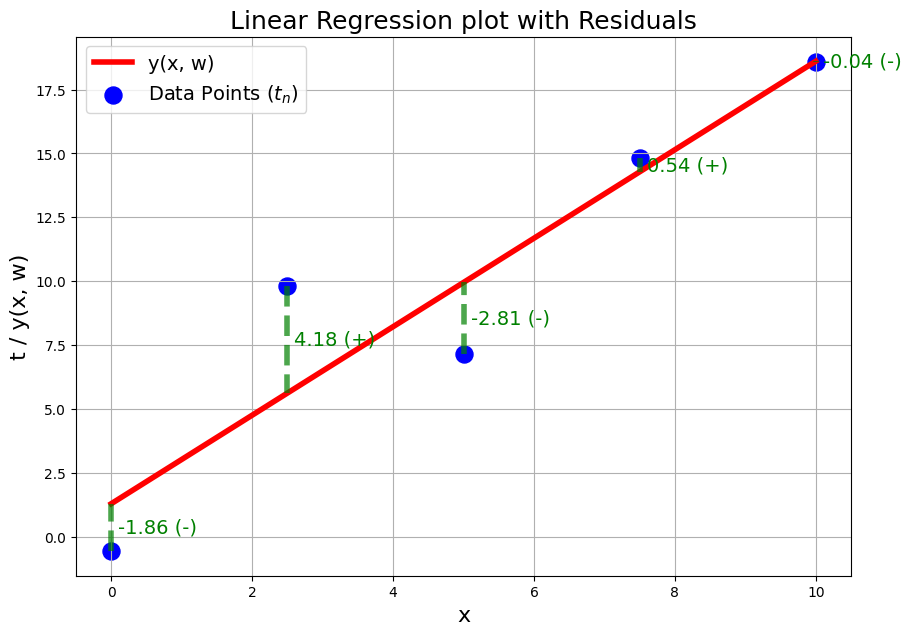

In [5]:
x_points = np.linspace(0, 10, 5) 
t_points = 2 * x_points + 1 + np.random.randn(5) * 5 

def plot_polynomial_with_residuals(x_data, t_data, degree=1, color='red', label='y(x, w)'):
    w = np.polyfit(x_data, t_data, degree)
    polynomial = np.poly1d(w)

    x_plot = np.linspace(x_data.min(), x_data.max(), 100)
    y_plot = polynomial(x_plot)

    plt.figure(figsize=(10, 7))

    plt.plot(x_plot, y_plot, color=color, label=label, linewidth=4) 

    plt.scatter(x_data, t_data, color='blue', label='Data Points ($t_n$)', s=150) 

    # Predict y values for all points
    y_predicted_points = polynomial(x_data)

    # Calculate residuals
    residuals = t_data - y_predicted_points

    # Show the distances (residuals) with green lines and indicate positive/negative
    for i in range(len(x_data)):
        x_i = x_data[i]
        t_i = t_data[i]
        y_pred_i = y_predicted_points[i]
        residual_i = residuals[i]

        plt.plot([x_i, x_i], [t_i, y_pred_i], color='green', linestyle='--', linewidth=4, alpha=0.7) 

        text_x_pos = x_i + (x_data.max() - x_data.min()) * 0.01 
        text_y_pos = (t_i + y_pred_i) / 2 

        sign = '+' if residual_i >= 0 else '-'
        plt.text(text_x_pos, text_y_pos, f'{residual_i:.2f} ({sign})',
                 fontsize=14, color='green', ha='left', va='center') 

    plt.xlabel('x', fontsize=16) 
    plt.ylabel('t / y(x, w)', fontsize=16) 
    plt.title(f'Linear Regression plot with Residuals', fontsize=18) 
    plt.legend(fontsize=14)
    plt.grid(True)
    # plt.savefig('linear_regression_with_residuals.png')
    plt.show()

plot_polynomial_with_residuals(x_points, t_points, degree=1, color='red', label='y(x, w)') 

### 2. **Explore Basis Functions**:

Basis functions are mathematical transformations applied to input variables to enable linear regression to model non-linear relationships. By extending the class of models to include linear combinations of fixed non-linear functions of the input variables, we can represent the target variable as:

$$
y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(x)
$$

Here:
- $\phi_j(x)$ are the **basis functions** that transform the input space.
- $w_0$ is the intercept (bias term).
- $w_j$ are the weights (coefficients) for the basis functions.

#### Common Types of Basis Functions:
1. **Polynomial Basis**:
    $$ \phi_j(x) = x^j $$
    Example: $\phi_1(x) = x, \phi_2(x) = x^2, \phi_3(x) = x^3, \dots$

2. **Radial Basis Functions (RBF)**:
    $$ \phi_j(x) = e^{-\frac{(x - \mu_j)^2}{2\sigma^2}} $$
    - $\mu_j$: Center of the Gaussian.
    - $\sigma$: Width (spread) of the Gaussian.

3. **Sigmoidal Basis**:
    $$ \phi_j(x) = \sigma\left(\frac{x - \mu_j}{\sigma}\right), \quad \sigma(a) = \frac{1}{1 + e^{-a}} $$
    - $\sigma(a)$: Sigmoid activation function.
    - Alternatively, the hyperbolic tangent can be used:
      $$ \tanh(a) = 2\sigma(2a) - 1 $$

4. **Sinusoidal Basis**:
    $$ \phi_j(x) = \sin(x_j) \quad \text{or} \quad \phi_j(x) = \cos(x_j) $$
    - Useful for periodic or oscillatory data.

These basis functions allow us to transform the input space into a higher-dimensional feature space, enabling linear regression to capture complex, non-linear patterns in the data. By choosing appropriate basis functions, we can tailor the model to the specific characteristics of the data.

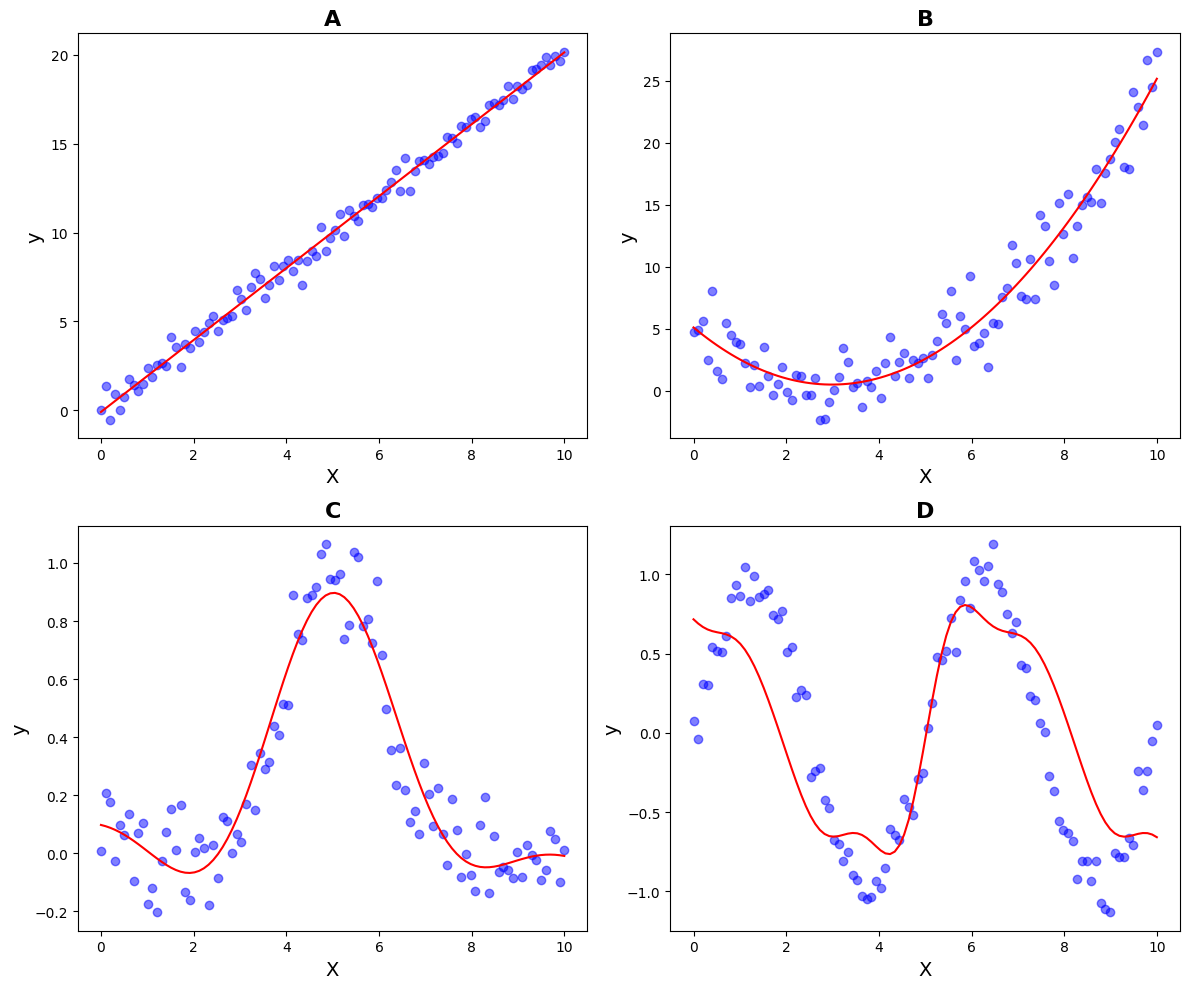

In [6]:
X_lr = np.linspace(0, 10, 100).reshape(-1, 1)
y_lr = 2 * X_lr.flatten() + np.random.normal(0, 0.5, X_lr.shape[0])

# Polynomial Basis Function (quadratic data with noise)
X_poly = np.linspace(0, 10, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly.flatten()**2 - 3 * X_poly.flatten() + 5 + np.random.normal(0, 2, X_poly.shape[0])

# Gaussian Basis Function (data with localized peaks)
X_gaussian = np.linspace(0, 10, 100).reshape(-1, 1)
y_gaussian = np.exp(-0.5 * (X_gaussian.flatten() - 5)**2) + np.random.normal(0, 0.1, X_gaussian.shape[0])

# Fourier Basis Function
X_fourier = np.linspace(0, 10, 100).reshape(-1, 1)
y_fourier = np.sin(2 * np.pi * X_fourier.flatten() / 5) + np.random.normal(0, 0.1, X_fourier.shape[0])  # Reduced noise

# Regular Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)
y_pred_lr = model_lr.predict(X_lr)

# Polynomial Basis Function
degree = 3
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_poly, y_poly)
y_pred_poly = model_poly.predict(X_poly)

# Gaussian Basis Function
kernel = RBF(length_scale=1.0)
model_gaussian = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
model_gaussian.fit(X_gaussian, y_gaussian)
y_pred_gaussian, _ = model_gaussian.predict(X_gaussian, return_std=True)

# Fourier Basis Function
def fourier_basis(x, n_terms=4):  
    basis = [np.ones_like(x)]
    for i in range(1, n_terms + 1):
        basis.append(np.sin(i * x))
        basis.append(np.cos(i * x))
    return np.column_stack(basis)

X_fourier_basis = fourier_basis(X_fourier.flatten(), n_terms=4)
model_fourier = LinearRegression()
model_fourier.fit(X_fourier_basis, y_fourier)
y_pred_fourier = model_fourier.predict(X_fourier_basis)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Regular Linear Regression
axs[0, 0].scatter(X_lr, y_lr, color='blue', alpha=0.5)
axs[0, 0].plot(X_lr, y_pred_lr, color='red')
axs[0, 0].set_title('A', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('X', fontsize=14)
axs[0, 0].set_ylabel('y', fontsize=14)

# Polynomial Basis Function
axs[0, 1].scatter(X_poly, y_poly, color='blue', alpha=0.5)
axs[0, 1].plot(X_poly, y_pred_poly, color='red')
axs[0, 1].set_title('B', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('X', fontsize=14)
axs[0, 1].set_ylabel('y', fontsize=14)

# Gaussian Basis Function
axs[1, 0].scatter(X_gaussian, y_gaussian, color='blue', alpha=0.5)
axs[1, 0].plot(X_gaussian, y_pred_gaussian, color='red')
axs[1, 0].set_title('C', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('X', fontsize=14)
axs[1, 0].set_ylabel('y', fontsize=14)

# Plotting the improved Fourier example
axs[1, 1].scatter(X_fourier, y_fourier, color='blue', alpha=0.5)
axs[1, 1].plot(X_fourier, y_pred_fourier, color='red')
axs[1, 1].set_title('D', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('X', fontsize=14)
axs[1, 1].set_ylabel('y', fontsize=14)

plt.tight_layout()
plt.show()
# # Save the figure
# fig.savefig('basis_functions.png', dpi=300)

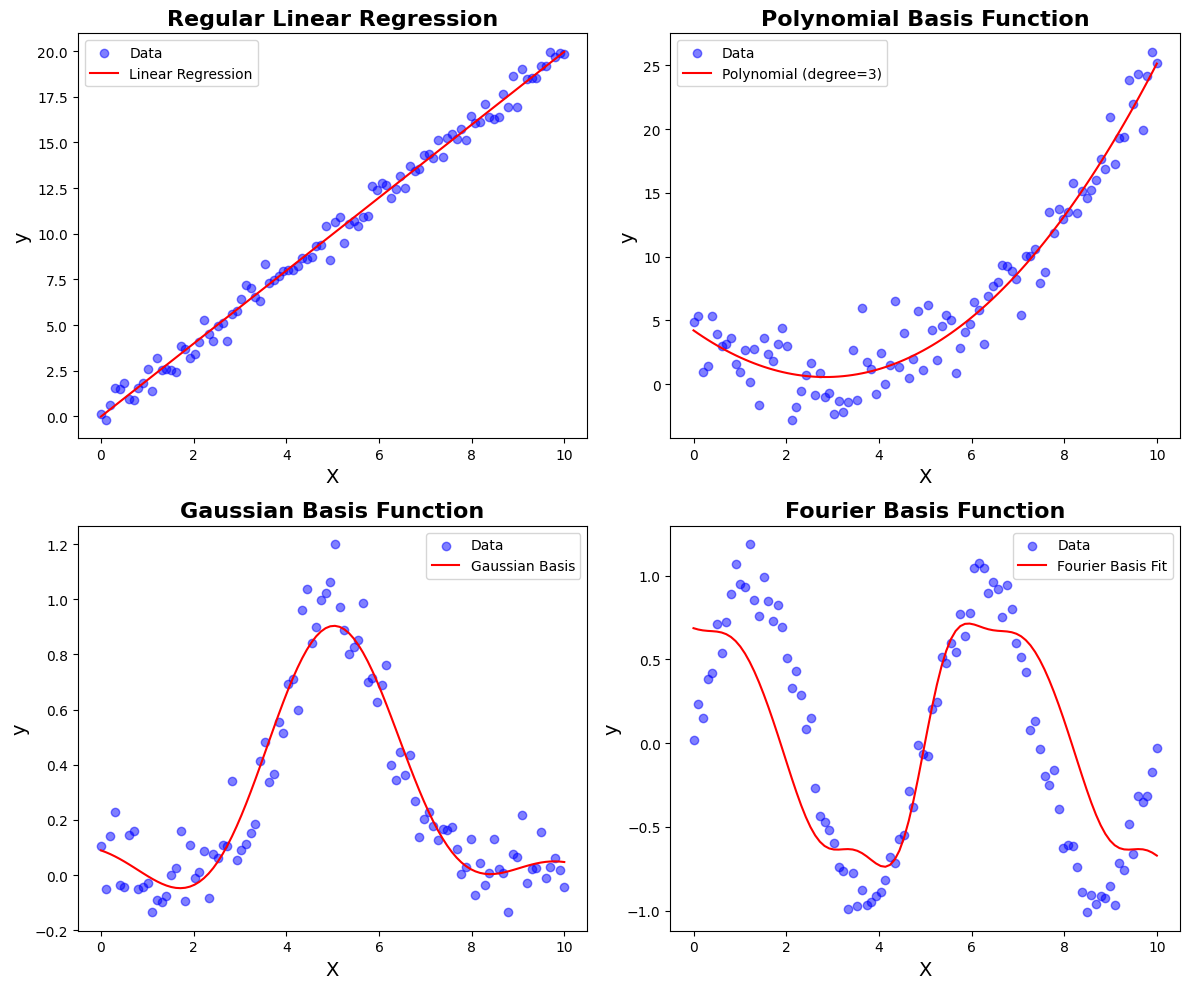

In [7]:
# Regular Linear Regression (linear data with noise)
X_lr = np.linspace(0, 10, 100).reshape(-1, 1)
y_lr = 2 * X_lr.flatten() + np.random.normal(0, 0.5, X_lr.shape[0])

# Polynomial Basis Function (quadratic data with noise)
X_poly = np.linspace(0, 10, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly.flatten()**2 - 3 * X_poly.flatten() + 5 + np.random.normal(0, 2, X_poly.shape[0])

# Gaussian Basis Function (data with localized peaks)
X_gaussian = np.linspace(0, 10, 100).reshape(-1, 1)
y_gaussian = np.exp(-0.5 * (X_gaussian.flatten() - 5)**2) + np.random.normal(0, 0.1, X_gaussian.shape[0])

# Fourier Basis Function
X_fourier = np.linspace(0, 10, 100).reshape(-1, 1)
y_fourier = np.sin(2 * np.pi * X_fourier.flatten() / 5) + np.random.normal(0, 0.1, X_fourier.shape[0])  # Reduced noise

# Regular Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)
y_pred_lr = model_lr.predict(X_lr)

# Polynomial Basis Function
degree = 3
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_poly, y_poly)
y_pred_poly = model_poly.predict(X_poly)

# Gaussian Basis Function
kernel = RBF(length_scale=1.0)
model_gaussian = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
model_gaussian.fit(X_gaussian, y_gaussian)
y_pred_gaussian, _ = model_gaussian.predict(X_gaussian, return_std=True)

# Fourier Basis Function
def fourier_basis(x, n_terms=4):  
    basis = [np.ones_like(x)]
    for i in range(1, n_terms + 1):
        basis.append(np.sin(i * x))
        basis.append(np.cos(i * x))
    return np.column_stack(basis)

X_fourier_basis = fourier_basis(X_fourier.flatten(), n_terms=4)
model_fourier = LinearRegression()
model_fourier.fit(X_fourier_basis, y_fourier)
y_pred_fourier = model_fourier.predict(X_fourier_basis)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Regular Linear Regression
axs[0, 0].scatter(X_lr, y_lr, color='blue', alpha=0.5, label='Data')
axs[0, 0].plot(X_lr, y_pred_lr, color='red', label='Linear Regression')
axs[0, 0].set_title('Regular Linear Regression', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('X', fontsize=14)
axs[0, 0].set_ylabel('y', fontsize=14)
axs[0, 0].legend()

# Polynomial Basis Function
axs[0, 1].scatter(X_poly, y_poly, color='blue', alpha=0.5, label='Data')
axs[0, 1].plot(X_poly, y_pred_poly, color='red', label=f'Polynomial (degree={degree})')
axs[0, 1].set_title('Polynomial Basis Function', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('X', fontsize=14)
axs[0, 1].set_ylabel('y', fontsize=14)
axs[0, 1].legend()

# Gaussian Basis Function
axs[1, 0].scatter(X_gaussian, y_gaussian, color='blue', alpha=0.5, label='Data')
axs[1, 0].plot(X_gaussian, y_pred_gaussian, color='red', label='Gaussian Basis')
axs[1, 0].set_title('Gaussian Basis Function', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('X', fontsize=14)
axs[1, 0].set_ylabel('y', fontsize=14)
axs[1, 0].legend()

# Plotting the improved Fourier example
axs[1, 1].scatter(X_fourier, y_fourier, color='blue', alpha=0.5, label='Data')
axs[1, 1].plot(X_fourier, y_pred_fourier, color='red', label='Fourier Basis Fit')
axs[1, 1].set_title('Fourier Basis Function', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('X', fontsize=14)
axs[1, 1].set_ylabel('y', fontsize=14)
axs[1, 1].legend()

plt.tight_layout()
plt.show()
# # Save the figure
# fig.savefig('basis_functions_labeled.png', dpi=300)

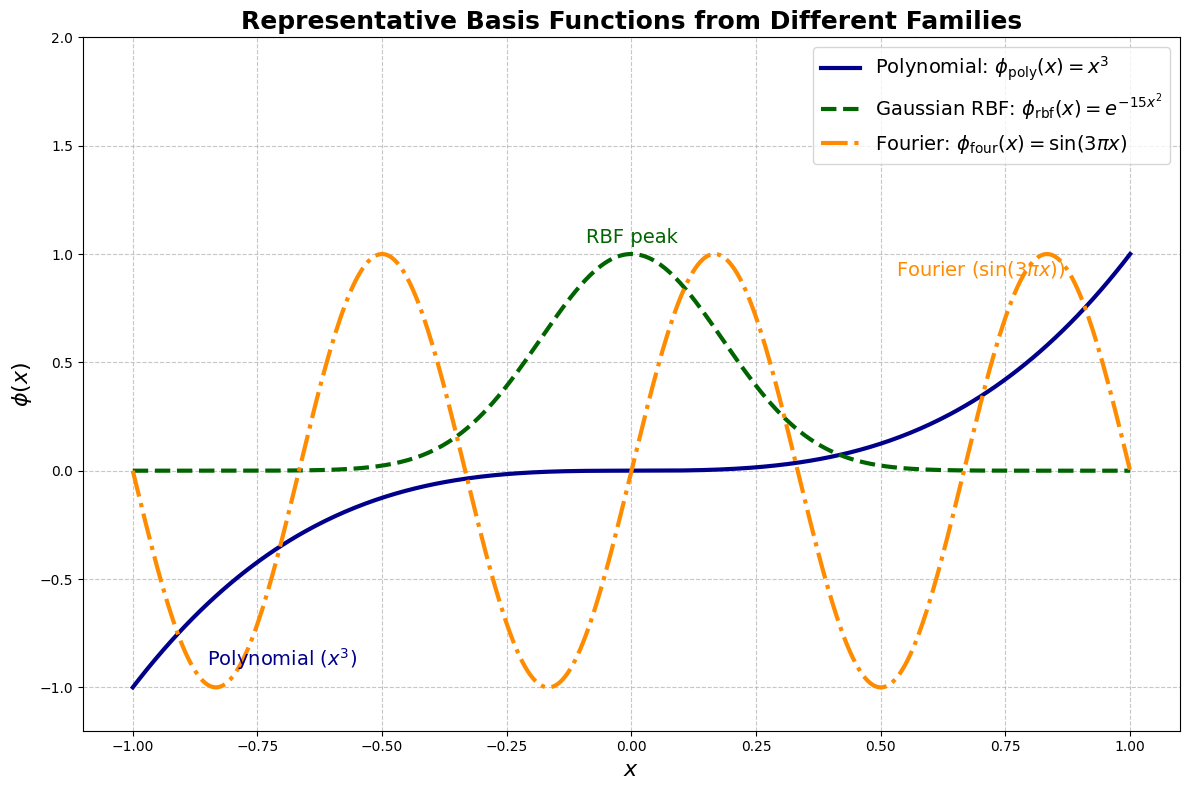

In [8]:
x = np.linspace(-1, 1, 400)[:, None]
x_flat = x[:, 0]

phi_poly = x_flat ** 3  # Polynomial  x^3
phi_rbf = np.exp(-15.0 * x_flat**2)  # Gaussian RBF, γ = 15, c = 0
phi_four = np.sin(3 * np.pi * x_flat)  # Fourier  sin(3πx)

plt.figure(figsize=(12, 8)) 

plt.plot(x_flat, phi_poly, color='darkblue', linestyle='-', linewidth=3, label=r"Polynomial: $\phi_{\mathrm{poly}}(x)=x^3$")
plt.plot(x_flat, phi_rbf, color='darkgreen', linestyle='--', linewidth=3, label=r"Gaussian RBF: $\phi_{\mathrm{rbf}}(x)=e^{-15x^{2}}$")
plt.plot(x_flat, phi_four, color='darkorange', linestyle='-.', linewidth=3, label=r"Fourier: $\phi_{\mathrm{four}}(x)=\sin(3\pi x)$")

plt.text(0, 1.05, "RBF peak", ha="center", fontsize=14, color='darkgreen')
plt.text(-0.7, -0.9, "Polynomial ($x^3$)", ha="center", fontsize=14, color='darkblue')
plt.text(0.7, 0.9, "Fourier ($\sin(3\pi x)$)", ha="center", fontsize=14, color='darkorange')

plt.title("Representative Basis Functions from Different Families", fontsize=18, fontweight='bold')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$\\phi(x)$", fontsize=16)
plt.legend(fontsize=14, loc='upper right')  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.ylim([-1.2, 2]) 
plt.tight_layout()

# # Save and display the plot
# plt.savefig('basis_functions_pedagogical.png', dpi=300)
plt.show()

### 3. **Compare Linear and Polynomial Regression**:

Linear regression assumes a straight-line relationship between the input features and the target variable. However, this assumption may not always hold true, especially for data with non-linear patterns. Polynomial regression extends linear regression by introducing polynomial terms of the input features, enabling the model to capture non-linear relationships.

- **Linear Regression**:
    - Fits a straight line to the data.
    - Simple and interpretable, but may underfit complex data.

- **Polynomial Regression**:
    - Extends linear regression by adding polynomial terms (e.g., $x^2$, $x^3$, etc.).
    - Can model non-linear relationships, but risks overfitting if the degree of the polynomial is too high.

In the following cell, we compare the performance of linear and polynomial regression models on the same dataset. We then use metrics like Mean Squared Error (MSE) to evaluate the fit.

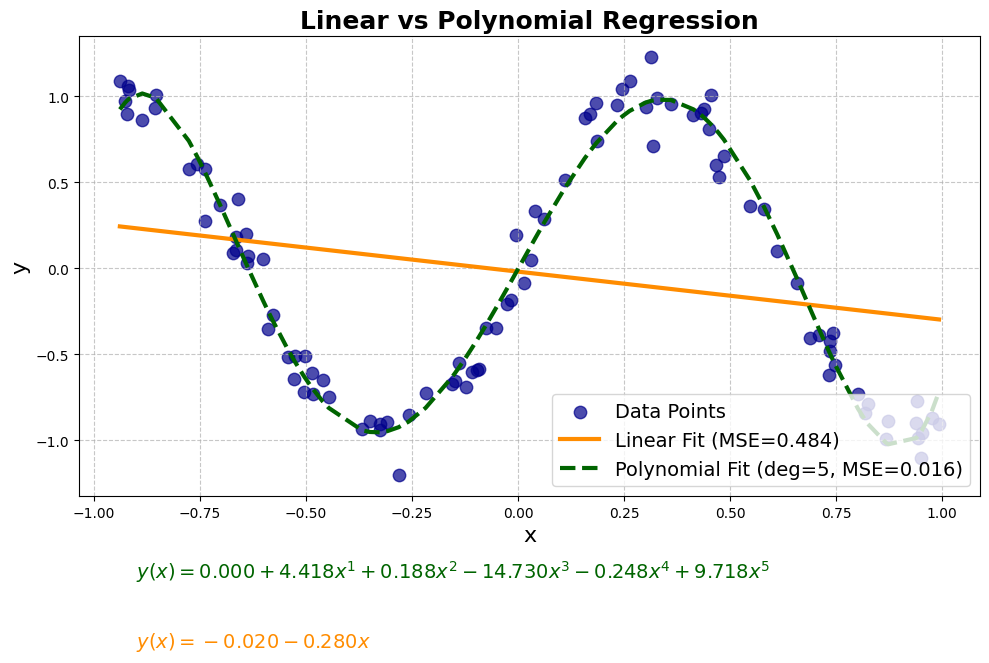

In [9]:
X = np.random.rand(100, 1)*2 - 1          
y = np.sin(5*X).ravel() + 0.1*np.random.randn(100)

# Fit a linear regression model
lin = LinearRegression()
lin.fit(X, y)

def get_linear_equation(intercept, coefficient):
    eq = f'y(x) = {intercept:.3f}'
    if coefficient >= 0:
        eq += f' + {coefficient:.3f}x'
    else:
        eq += f' - {-coefficient:.3f}x'
    return f'${eq}$' 

linear_equation = get_linear_equation(lin.intercept_, lin.coef_[0])

idx = np.argsort(X.ravel())
plt.figure(figsize=(10, 7)) 

plt.scatter(X, y, color='darkblue', alpha=0.7, label="Data Points", s=80)

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error for the linear regression model
mse_lin = mean_squared_error(y, lin.predict(X))

# Linear regression line
plt.plot(X[idx], lin.predict(X)[idx], color='darkorange', linestyle='-', linewidth=3,
         label=f"Linear Fit (MSE={mse_lin:.3f})")

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define and fit the polynomial regression model
degree = 5  # Degree of the polynomial
lin_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lin_poly.fit(X, y)

# Predict using the polynomial regression model
poly = X  
mse_poly = np.mean((y - lin_poly.predict(poly))**2) 

# Polynomial regression line
plt.plot(X[idx], lin_poly.predict(poly)[idx], color='darkgreen', linestyle='--', linewidth=3,
         label=f"Polynomial Fit (deg={degree}, MSE={mse_poly:.3f})")

# Construct the polynomial equation string
def get_polynomial_equation(coefficients):
    terms = [f'{coefficients[0]:.3f}']
    for i, coef in enumerate(coefficients[1:], start=1):
        if coef >= 0:
            terms.append(f'+ {coef:.3f}x^{i}')
        else:
            terms.append(f'- {-coef:.3f}x^{i}')
    return f"$y(x) = {' '.join(terms)}$"

poly_equation = get_polynomial_equation(lin_poly.named_steps['linearregression'].coef_)

plt.text(-0.9, -1.8, poly_equation, fontsize=14, color='darkgreen', ha='left')
plt.text(-0.9, -2.2, linear_equation, fontsize=14, color='darkorange', ha='left')

plt.title("Linear vs Polynomial Regression", fontsize=18, fontweight='bold')
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.legend(fontsize=14, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()

# # Save and display the plot
# plt.savefig('linear_vs_polynomial_pedagogical.png', dpi=300)
plt.show()


### 4. **Visualize Linear Regression Geometry**:

- In the next cell we will show:
    - **Residuals**: The difference between the predicted values and the actual target values.
    - **Span of Input Features ($\mathbb{X}$)**: The subspace formed by all linear combinations of the input feature vectors.

- **Linear Prediction**:
    The prediction $\mathbf{Y}(\mathbb{X}, \mathbf{w}) = \mathbb{X} \mathbf{w}$ is a **linear combination** of the columns of $\mathbb{X}$. This means that the predicted vector $\mathbf{Y}$ lies in the **span** of the input matrix $\mathbb{X}$, denoted as $\text{span}(\mathbb{X})$.

- **Interpretation**:
    - The predicted vector $\mathbf{Y}$ will always lie in $\text{span}(\mathbb{X})$, even if the ground-truth vector $\mathbf{t}$ does not.
    - The goal of linear regression is to find the vector $\mathbf{Y}$ in $\text{span}(\mathbb{X})$ that is **closest** to the ground-truth vector $\mathbf{t}$.

- **Minimizing Residuals**:
    - The **residual vector** $\mathbf{e} = \mathbf{t} - \mathbf{Y}$ represents the difference between the ground-truth vector $\mathbf{t}$ and the predicted vector $\mathbf{Y}$.
    - To minimize the distance between $\mathbf{Y}$ and $\mathbf{t}$, we minimize the length (or magnitude) of the residual vector $\mathbf{e}$.

- **Orthogonal Projection**:
    - The residual vector $\mathbf{e}$ is minimized when $\mathbf{Y}$ is the **orthogonal projection** of $\mathbf{t}$ onto $\text{span}(\mathbb{X})$.
    - This ensures that $\mathbf{e}$ is orthogonal to $\text{span}(\mathbb{X})$, satisfying the condition for the best fit in linear regression.


In [10]:
# =================== Tunables ===================
SCALE        = 2.0
LINE_W       = 14
HEAD_SIZE_T  = 1.9   
HEAD_SIZE_E  = 1.5   
COEFF_RANGE  = 3.0   
GRID_LINES   = 11
PAD_RATIO    = 0.20
BRACKET_FRAC = 0.22  
# =================================================

x1 = np.array([3.0, 0.4, 0.6]) * SCALE
x2 = np.array([1.2, 2.4, -0.5]) * SCALE

w1, w2 = 1.5, 0.9
residual_height = 2.2 * SCALE

O = np.zeros(3)
Y = w1*x1 + w2*x2

def unit(v):
    n = np.linalg.norm(v);  return v/n if n else v

def gram_schmidt(a, b):
    u1 = unit(a)
    b_perp = b - np.dot(b, u1)*u1
    u2 = unit(b_perp)
    return u1, u2

u_hat, v_hat = gram_schmidt(x1, x2)
n_hat = unit(np.cross(u_hat, v_hat))     

t = Y + residual_height*n_hat            

nu = nv = 45
U = np.linspace(-COEFF_RANGE, COEFF_RANGE, nu)
V = np.linspace(-COEFF_RANGE, COEFF_RANGE, nv)
UU, VV = np.meshgrid(U, V)
P = UU[...,None]*x1 + VV[...,None]*x2

plane = go.Surface(
    x=P[...,0], y=P[...,1], z=P[...,2],
    opacity=0.22, showscale=False, name="span(X)",
    surfacecolor=np.zeros_like(P[...,0]),
    colorscale=[[0,"green"],[1,"green"]],
    hoverinfo="skip"
)

grid = []
for s in np.linspace(-COEFF_RANGE, COEFF_RANGE, GRID_LINES):
    a, b = s*x1 + (-COEFF_RANGE)*x2, s*x1 + (COEFF_RANGE)*x2
    grid.append(go.Scatter3d(x=[a[0],b[0]], y=[a[1],b[1]], z=[a[2],b[2]],
                             mode="lines", line=dict(width=2, color="rgba(0,90,0,0.6)"),
                             showlegend=False, hoverinfo="skip"))
    a, b = (-COEFF_RANGE)*x1 + s*x2, (COEFF_RANGE)*x1 + s*x2
    grid.append(go.Scatter3d(x=[a[0],b[0]], y=[a[1],b[1]], z=[a[2],b[2]],
                             mode="lines", line=dict(width=2, color="rgba(0,90,0,0.6)"),
                             showlegend=False, hoverinfo="skip"))


line_traces, cone_traces = [], []

def arrow(start, end, name, color, width=LINE_W, head=1.6, back=None, dash=None, show_legend=True):
    vec = end - start
    L = np.linalg.norm(vec)
    if L == 0: return
    if back is None:
        back = max(0.9*head, 0.02*L)   
    tip_base = end - back*(vec/L)

    line_traces.append(go.Scatter3d(
        x=[start[0], tip_base[0]], y=[start[1], tip_base[1]], z=[start[2], tip_base[2]],
        mode="lines",
        line=dict(width=width, color=color, dash=dash) if dash else dict(width=width, color=color),
        name=name, showlegend=show_legend, hoverinfo="skip"
    ))
    cone_traces.append(go.Cone(
        x=[end[0]], y=[end[1]], z=[end[2]],
        u=[vec[0]], v=[vec[1]], w=[vec[2]],
        sizemode="absolute", sizeref=head, anchor="tip",
        showscale=False, colorscale=[[0, color],[1, color]],
        name=name, showlegend=False
    ))

# basis vectors
arrow(O, x1, "X·,1", "darkgreen")
arrow(O, x2, "X·,2", "darkgreen")

# Y (prediction)
arrow(O, Y, "Y = Xw", "black")

# t
arrow(O, t, "t", "#d62728", head=HEAD_SIZE_T)

# residual e 
arrow(Y, t, "e = t − Xw", "#ff9800", head=HEAD_SIZE_E, width=LINE_W-2)

# Blue right-angle
y_dir = unit(Y - O)          
e_dir = unit(t - Y)          

tick  = BRACKET_FRAC * min(np.linalg.norm(x1), np.linalg.norm(x2)) * SCALE  
h = tick                                                     

base   = Y - tick * y_dir                  
corner = base + h * e_dir                  
end_on_residual = Y + h * e_dir           

bracket = go.Scatter3d(
    x=[base[0], corner[0], end_on_residual[0]],
    y=[base[1], corner[1], end_on_residual[1]],
    z=[base[2], corner[2], end_on_residual[2]],
    mode="lines",
    line=dict(width=10, color="royalblue"),
    showlegend=False, hoverinfo="skip"
)

p1 = Y - tick * y_dir     
p2 = p1 + tick * e_dir     

pts = np.vstack([O, x1, x2, Y, t, p1, p2])
mins, maxs = pts.min(axis=0), pts.max(axis=0)
pad = PAD_RATIO * np.max(maxs - mins if np.any(maxs - mins) else np.array([1,1,1]))
xr, yr, zr = [mins[0]-pad, maxs[0]+pad], [mins[1]-pad, maxs[1]+pad], [mins[2]-pad, maxs[2]+pad]

# labels
def label(pt, text, d=0.12*SCALE):
    return dict(x=pt[0]+d, y=pt[1]+d, z=pt[2]+d, text=text,
                showarrow=False, bgcolor="rgba(255,255,255,0.85)", bordercolor="black")
ann = [label(x1,"X<sub>·,1</sub>"), label(x2,"X<sub>·,2</sub>"),
       label(Y,"Y = Xw"), label(t,"t"), label((Y+t)/2,"e")]

fig = go.Figure(data=[plane, *grid, bracket, *line_traces, *cone_traces])  # cones last

fig.update_layout(
    title="Linear Regression Geometry",
    width=1100, height=900,
    scene=dict(
        xaxis=dict(title="x", range=xr, zeroline=False, showbackground=False),
        yaxis=dict(title="y", range=xr, zeroline=False, showbackground=False),
        zaxis=dict(title="z", range=xr, zeroline=False, showbackground=False),
        annotations=ann,
        aspectmode="cube",
        camera=dict(eye=dict(x=1, y=-1, z=1.4))
    ),
    legend=dict(x=0.02, y=0.98, bgcolor="rgba(255,255,255,0.75)")
)

fig.show()
# fig.write_image("linreg-3d-geometry.png", scale = 4)
# fig.write_html("linreg-3d-geometry.html", include_plotlyjs='cdn')

### 5. **Analyze Residuals**:

Residuals are the differences between the observed values (actual target values) and the predicted values from a regression model. Analyzing residuals helps assess the model's fit and identify potential issues such as non-linearity, heteroscedasticity, or outliers.

#### Concepts in the next cell:
1. **Residual Plot**:
    - A scatter plot of residuals (on the y-axis) versus fitted values (on the x-axis).
    - Ideally, residuals should be randomly scattered around zero, indicating a good fit.

2. **Heteroscedasticity**:
    - Occurs when the variance of residuals is not constant across fitted values.
    - Often visualized as a "fan-shaped" pattern in the residual plot.
    - Indicates that the model may not be capturing all patterns in the data.

### 6. **Apply Linear Regression to Real-World Data**:
In the next cell we will use the California Housing dataset to fit a simple linear regression model. We then evaluate the model using metrics like Mean Squared Error (MSE) and R-squared.

Test MSE: 0.6057
Test R^2: 0.3754
Adjusted R^2: 0.3707


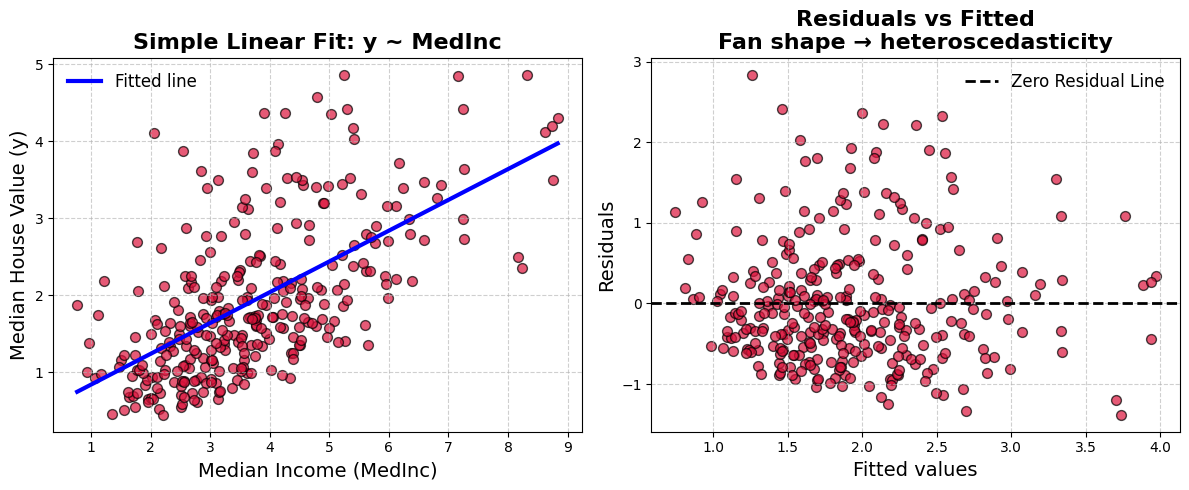

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

df = df[["MedInc", "MedHouseVal"]].rename(columns={"MedHouseVal": "y"})

# Filter data to remove extreme outliers
df = df[(df["MedInc"] < 10) & (df["y"] < 5)]

# Stratified subsample over MedInc quantiles to keep coverage but reduce clutter
np.random.seed(7)
q = pd.qcut(df["MedInc"], q=15, duplicates="drop")
sampled = (
    df.groupby(q, observed=True)
      .apply(lambda g: g.sample(n=min(len(g), 30), random_state=7))
      .reset_index(drop=True)
)

X = sampled[["MedInc"]].values
y = sampled["y"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

resid_train = y_train - y_pred_train
resid_test  = y_test  - y_pred_test

# Metrics (test set)
mse = mean_squared_error(y_test, y_pred_test)
r2  = r2_score(y_test, y_pred_test)
n, p = X_test.shape[0], X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")

def binned_trend(x, y, bins=12):
    edges = np.linspace(np.min(x), np.max(x), bins + 1)
    idx = np.digitize(x, edges) - 1
    xc = []
    yc = []
    for b in range(bins):
        mask = idx == b
        if np.any(mask):
            xc.append(np.mean(x[mask]))
            yc.append(np.mean(y[mask]))
    return np.array(xc), np.array(yc)

# Plot 1: Data & fitted line
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_train, y_train, s=50, alpha=0.7, edgecolor="k", color="crimson")
xline = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
yline = model.predict(xline)
axs[0].plot(xline, yline, lw=3, label="Fitted line", color="blue", zorder=3)
axs[0].set_xlabel("Median Income (MedInc)", fontsize=14)
axs[0].set_ylabel("Median House Value (y)", fontsize=14)
axs[0].set_title("Simple Linear Fit: y ~ MedInc", fontsize=16, fontweight="bold")
axs[0].legend(frameon=False, fontsize=12)
axs[0].grid(True, linestyle="--", alpha=0.6)

# Plot 2: Residuals vs Fitted 
axs[1].scatter(y_pred_train, resid_train, s=50, alpha=0.7, edgecolor="k", color="crimson")
axs[1].axhline(0, color="k", lw=2, ls="--", label="Zero Residual Line")
axs[1].set_xlabel("Fitted values", fontsize=14)
axs[1].set_ylabel("Residuals", fontsize=14)
axs[1].set_title("Residuals vs Fitted\nFan shape → heteroscedasticity", fontsize=16, fontweight="bold")
axs[1].legend(frameon=False, fontsize=12)
axs[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
# fig.savefig("linreg-california-housing.png", dpi=300)